# Лабораторная работа №0

Данная лабораторная работа **предполагает обязательную командную работу** и 

нацелена на то, что бы научить вас правильно "смотреть на данные".

## Задание

Выберете один из трёх датасетов:

[Trending YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new)

[Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews)

[US-Accidents](https://www.kaggle.com/sobhanmoosavi/us-accidents)

и основываясь на данных из них сделайте как можно больше выводов, каждый вывод должен быть отдельно оформлен и подкреплён графиками.

## Правила выполнения

Выполнение данной лабораторной предполагает **работу в команде**. Следовательно, студент без команды не может получить оценку за неё. Команда должна содержать **от 2-х до 5-ти человек**.

После того, как вы сформировали команду и выбрали капитана. Капитан должен отправить в задание "Лабораторная работа 0" сообщение со списком членов своей команды, после чего состав команды менять нельзя.
    
После того, как вы исчерпали свои идеи, загружайте решение в задание "Лабораторная работа 0". Проверяется только решение, которое было загружено первым.
    
Если вы успели сделать задание за время семинара, то вы можете **увеличить баллы своей команды в 2 раза рассказав о проделанной работе остальным**.
    
В этом задании вы соревнуетесь с другими командами, которые выбрали тот же датасет. Максимальное число баллов, которое может получить каждый член команды за это задание 5 (без учёта надбавки за выступление).
    
После того, как все команды загрузили свои решения, мы начинаем проверять ваши решения с тех команд, которые раньше его загрузили. Каждой команде мы засчитываем только те выводы, которых не было в решениях предыдущих команд. Количество засчитанных выводов делится на количество всех уникальных выводов, сделанных всеми командами. Затем максимальное число баллов умножается на данный коэффициент и получается ваша оценка, которая может быть домножена на 2, если вы выступили на семинаре.

### Пример

Пусть в соревновании участвовали 2 команды. 

Первая команда сделала выводы 1, 2, 3 и выступила на семинаре. 

Вторая - сделала выводы 1, 2, 4, 5, 6, 7, 8 и загрузила своё решение после семинара. 

Тогда первая команда получит (3/8) * 5 * 2 ~ 3.75, а вторая (5/8) * 5 ~ 3.1 (второй команде не будут засчитаны выводы 1 и 2)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Wine Reviews.csv', index_col=0)

In [3]:
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


## Инсайты

1. Самый широкий спектр вин

In [89]:
df.groupby('winery')['variety'].nunique().sort_values(ascending=False).reset_index().head()

,winery,variety
0,Fenestra,28
1,Columbia Crest,26
2,Maryhill,24
3,Recanati,21
4,V. Sattui,21


2. Наибольшие рейтинги среди видов

In [92]:
df.groupby('variety')['points'].mean().sort_values(ascending=False).head()

variety
Terrantez              95.000000
Tinta del Pais         95.000000
Gelber Traminer        95.000000
Bual                   94.142857
Riesling-Chardonnay    94.000000
Name: points, dtype: float64

3. Оценки юзеров с Твиттером и без

In [99]:
df[df['taster_twitter_handle'].isna()]['points'].mean(), df[df['taster_twitter_handle'].notna()]['points'].mean()

(87.850863422292, 88.6355940784544)

4. Чем длиннее описание, тем выше оценки

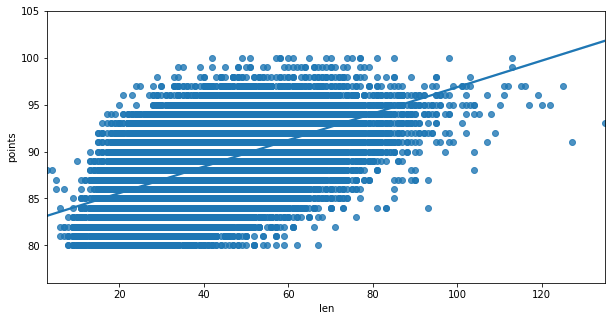

In [102]:
df['len'] = df['description'].apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(10,5))
sns.regplot(x=df['len'], y=df['points'])
plt.ylim(76, 105)
plt.show()

5. Положительная связь между ценой и оценкой

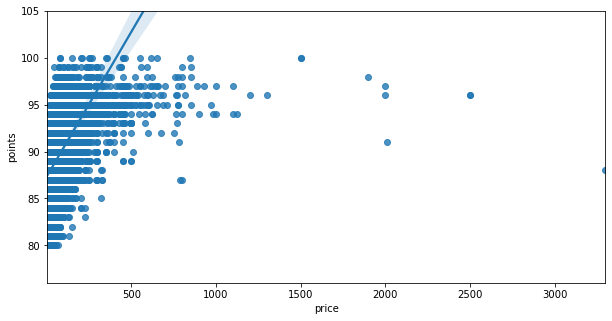

In [53]:
plt.figure(figsize=(10,5))
sns.regplot(x=df['price'], y=df['points'])
plt.ylim(76, 105)
plt.show()

6. В Англии самый высокий средний рейтинг

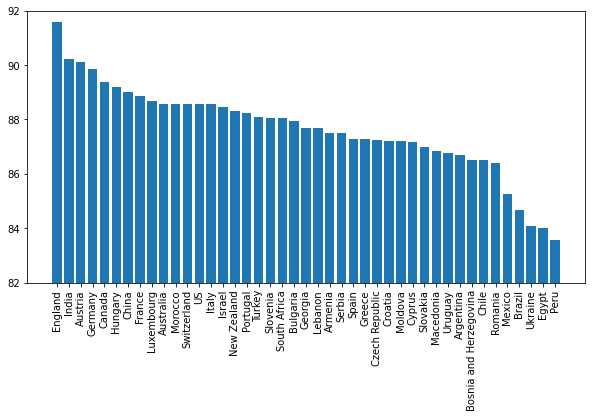

In [45]:
data_1 = df.groupby('country')['points'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.bar(x=data_1.index, height=data_1.values, )
plt.xticks(range(data_1.shape[0]), data_1.index, rotation=90)
plt.ylim(82, 92)
plt.show()

7. Дегустатор Anne Kreibienhl MW ставит обычно оценки выше прочих (средневзвешанно по кол-ву!)

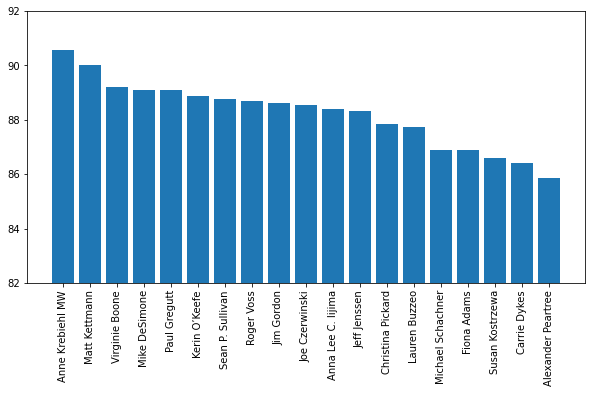

In [72]:
def grouped_weighted_avg(values, weights, by):
    return (values * weights).groupby(by).sum() / weights.groupby(by).sum()

data_3 = df.groupby('taster_name').agg({'points': 'mean', 'winery': 'count'}).reset_index()
data_3['points_mean_weighted'] = grouped_weighted_avg(values=data_3.points, weights=data_3.winery, by=data_3.index)
data_3 = data_3.sort_values(by='points_mean_weighted', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(x=data_3.taster_name, height=data_3.points_mean_weighted, )
plt.xticks(range(data_3.shape[0]), data_3.taster_name, rotation=90)
plt.ylim(82, 92)
plt.show()